In [ ]:
# import libraries needed
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image            #brings outside files/sources into python code
#import matplotlib.colors as mcolors

In [ ]:
# connect to google drive to load and save images
from google.colab import drive
drive.mount('/content/drive', force_remount=True)             #connects GD to python


Mounted at /content/drive


In [ ]:
# Define string variables for file paths and names
root_dir = '/content/drive/My Drive/'         # Do not change this line, the root_dir is absolute for G-Drive
img_path = root_dir + 'URAP_Work/'                 # image path should be a subfold of the root_dir
old_name = "Case9.1_OG.jpg"
new_name = "Case9.1_BestT.jpg"                           #uses GD to import and export files
new_name2 = "Case9.1_Best_EditedT.jpg"
#new_name = "Test.jpg"    #Test code without needing to change new file

In [ ]:
def plot_source_path(img_file_input, img_file_output, img_file_output2, src_true, csv_file, edit_csv_file):
  # to read the image stored in the working directory
  img_data = image.imread(img_file_input)
  print ("Image Size: ", img_data.shape)                     #reads the image and creates background for graph
  csv_data = np.genfromtxt (csv_file, delimiter=',', dtype = float)       #graph with pred plot on true source
  #Data = np.genfromtxt (img_path + "Text_3.csv", delimiter=',', dtype = float)        #graph without pred plot on true source
  src_data = csv_data[1:, :]
  edit_data_csv = np.genfromtxt (edit_csv_file, delimiter=',', dtype = float)
  edit_data = edit_data_csv[1:, :]


  print (src_data.shape)
  #print (src_data)

  colors = ["r", "g", "b", "m", "c", "brown", "pink", "olive", "darkred"]

  # Plot the true source location (0.25,0.25) on the image
  True_X = src_true[:,0] * img_data.shape[1]
  True_Y = src_true[:,1] * img_data.shape[0]
  plt.plot(True_X, True_Y,
          marker='o', markerfacecolor="none", markeredgecolor="w", markersize=9, linestyle="none")               #natural gas point, "plt.plot" used to add point to graph

  for i in range (src_data.shape[1]//2):
    # Plot the predicted path on the image
    Pred_X = src_data[:, 2*i] * img_data.shape[1]
    Pred_Y = src_data[:, 2*i+1] * img_data.shape[0]
    plt.plot(Pred_X, Pred_Y, color="w", linewidth=1, linestyle = '-',
            marker='o', markersize=5, markerfacecolor='none', markeredgecolor="none")  #predicted path, "plt.plot" used to add point,  "np.array" used for multiple values (requires third x to equal third 3, cannot have third x-value set with fourth y-value)

    Edit_X = edit_data[:, 2*i] * img_data.shape[1]
    Edit_Y = edit_data[:, 2*i+1] * img_data.shape[0]
    plt.plot(Edit_X, Edit_Y, color="k", linewidth=1, linestyle = 'none',
            marker='o', markersize=5, markerfacecolor=colors[i % len(colors)], markeredgecolor="k")

    # Plot the initial location (0.5,0.5) on the image
    Init_X = src_data[0, 2*i] * img_data.shape[1]
    Init_Y = src_data[0, 2*i+1] * img_data.shape[0]
    plt.plot(Init_X, Init_Y,
            marker='o', markerfacecolor=colors[i % len(colors)], markeredgecolor="k", markersize=5)            #starting point, "plt.plot"used to add point (does not create line to predicted path)

  # remove the axis from image plot
  plt.axis('off')             #removes axis lines

  # show images on the screen
  plt.imshow(img_data, alpha=1)          #displays data as an image


  # save as image file 1 in google drive
  plt.savefig(img_file_output, bbox_inches='tight', pad_inches=0)          #saves graph to file that gets sent to GD

  plt.show()

  #starts new image
  img_data = image.imread(img_file_input)
  print ("Image Size: ", img_data.shape)

  True_X = src_true[:,0] * img_data.shape[1]
  True_Y = src_true[:,1] * img_data.shape[0]
  plt.plot(True_X, True_Y,
          marker='o', markerfacecolor="none", markeredgecolor="w", markersize=9, linestyle="none")

  for i in range (edit_data.shape[1]//2):
    Edit_X = edit_data[:, 2*i] * img_data.shape[1]
    Edit_Y = edit_data[:, 2*i+1] * img_data.shape[0]
    plt.plot(Edit_X, Edit_Y, color="w", linewidth=1, linestyle = '-',
            marker='o', markersize=5, markerfacecolor=colors[i % len(colors)], markeredgecolor="k")
    Init_X = src_data[0, 2*i] * img_data.shape[1]
    Init_Y = src_data[0, 2*i+1] * img_data.shape[0]
    plt.plot(Init_X, Init_Y,
            marker='o', markerfacecolor=colors[i % len(colors)], markeredgecolor="k", markersize=5)

  plt.axis('off')
  plt.imshow(img_data, alpha=1)

  #saves as image 2 file in GD
  plt.savefig(img_file_output2, bbox_inches='tight', pad_inches=0)
  plt.show()


Image Size:  (384, 384, 3)
(47, 10)


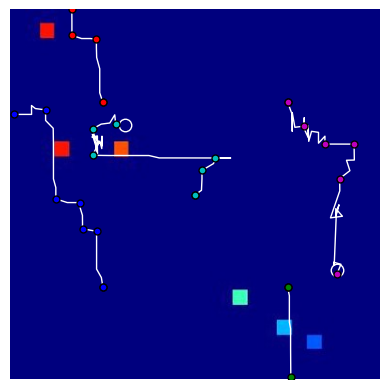

Image Size:  (384, 384, 3)


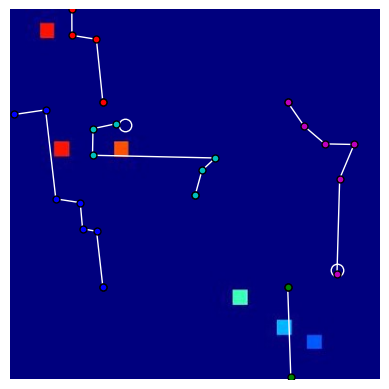

In [ ]:
src_true = np.array([[0.30984214, 0.31220122], [0.88310476, 0.70465457]])     #Add true source values in [x,y] format
plot_source_path(img_path+old_name, img_path+new_name, img_path+new_name2, src_true, img_path+"Case9.1_best.csv", img_path+"Case9.1_best_Edited.csv") #Calls function; add data file in .csv